<a href="https://colab.research.google.com/github/racheljhuh/HMI/blob/main/indassignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import numpy as np # Import the numpy package into your workspace
import pandas as pd  # Import the pandas package into your workspace
import seaborn as sns # Import Seaborn
import matplotlib.pyplot as plt
! git clone https://www.github.com/racheljhuh/HMI
df = pd.read_csv('./HMI/sensorReadings-ia6-sys3023.csv',low_memory=False) #asked chat gpt for encoding
df.head()


fatal: destination path 'HMI' already exists and is not an empty directory.


,Time,AvePressure [N/sq cm],MaxPressure [N/sq cm],MinPressure [N/sq cm],Force [N],Contact Area [sq cm],Centroid X [cm],Centroid Y [cm],Centroid Z [cm]
0,566.925,-0.074,0.061,-0.287,0.05,1.8,1.1,2.4,0
1,566.959,-0.074,0.061,-0.287,0.05,1.8,1.2,2.4,0
2,566.993,-0.074,0.061,-0.287,0.05,1.8,1.2,2.4,0
3,567.027,-0.074,0.061,-0.288,0.05,1.8,1.2,2.4,0
4,567.061,-0.074,0.061,-0.288,0.05,1.8,1.2,2.4,0


<ipython-input-15-c2067c5d6ef2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rdf['Time'] -= 566.925
<ipython-input-15-c2067c5d6ef2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf['Time'] -= 720


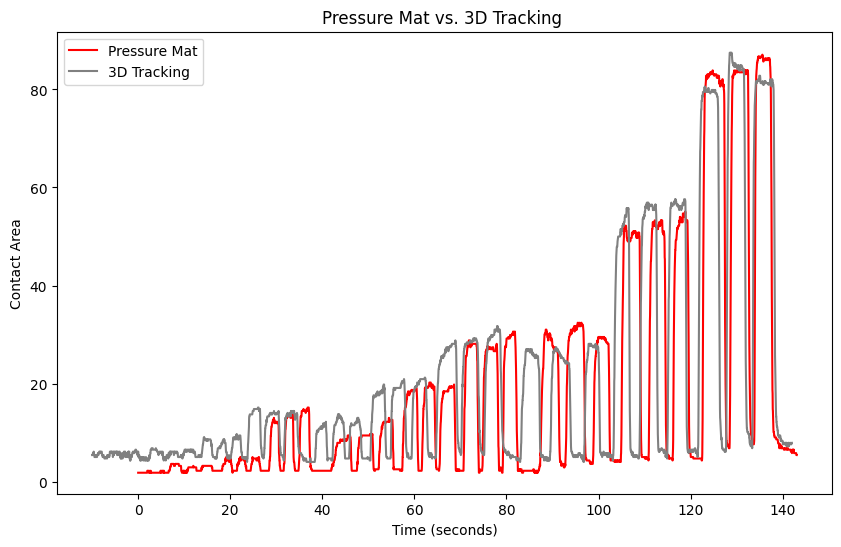

In [15]:
#1)
df.rename(columns={'Time ': 'Time'}, inplace=True)
df = df[df['Time'] < 862] #Clean the Shaking

gdf = df[df['Time'] >= 710]  # Select data from time 710 seconds onwards for grey trial
rdf = df[df['Time'] < 710]    # Select data before 710 seconds for red trial

# Subtract 566.925 from all time values in the grey trial
rdf['Time'] -= 566.925
# Subtract 710 from all time values in the grey trial
gdf['Time'] -= 720

#Plot the graphs on top of each other
plt.figure(figsize=(10, 6))
plt.plot(rdf['Time'], rdf['Contact Area [sq cm]'], color='red', label='Pressure Mat')

# Plot the grey trial data in grey
plt.plot(gdf['Time'], gdf['Contact Area [sq cm]'], color='grey', label='3D Tracking')

plt.xlabel('Time (seconds)')
plt.ylabel('Contact Area')
plt.legend()
plt.title('Pressure Mat vs. 3D Tracking ')
# Show the graph
plt.show()


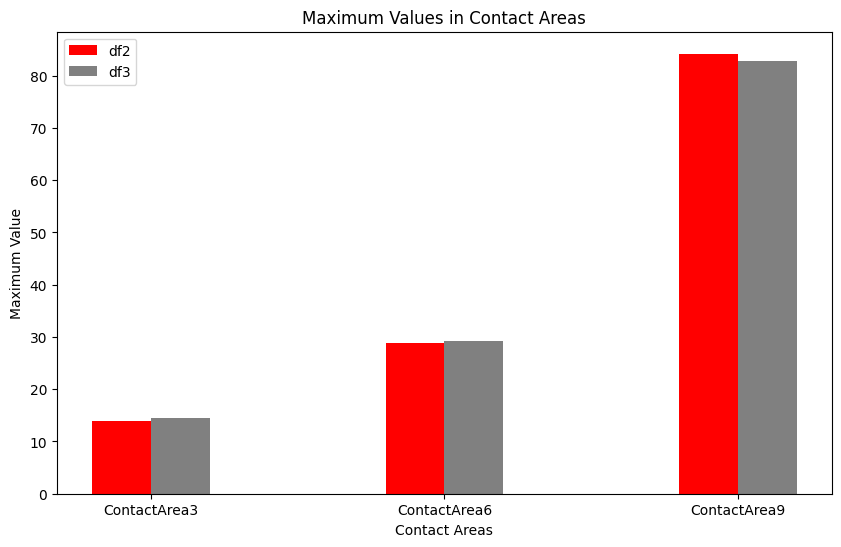

In [50]:
#2)
df2 = pd.read_csv('/content/sensorReadingssimplified.csv',low_memory=False) #asked chat gpt for encoding
df3 = pd.read_csv('/content/sensorReadingsreal-trial2.csv', low_memory=False)
max_values_df2 = df2[['ContactArea3', 'ContactArea6', 'ContactArea9']].max()
max_values_df3 = df3[['ContactArea3', 'ContactArea6', 'ContactArea9']].max()

# Create a bar chart to visualize the maximum values for both DataFrames
plt.figure(figsize=(10, 6))

# Define the width of each bar
bar_width = 0.2

# Generate positions for bars for both DataFrames
bar_positions_df2 = range(len(max_values_df2))
bar_positions_df3 = [x + bar_width for x in bar_positions_df2]

# Create bars for df2 with red color
plt.bar(bar_positions_df2, max_values_df2, width=bar_width, color='red', label='df2')

# Create bars for df3 with grey color
plt.bar(bar_positions_df3, max_values_df3, width=bar_width, color='grey', label='df3')

# Set x-axis labels
plt.xticks([p + bar_width / 2 for p in bar_positions_df2], max_values_df2.index)

plt.title('Maximum Values in Contact Areas')
plt.xlabel('Contact Areas')
plt.ylabel('Maximum Value')
plt.legend()  # Add a legend to differentiate between df2 and df3

plt.show()



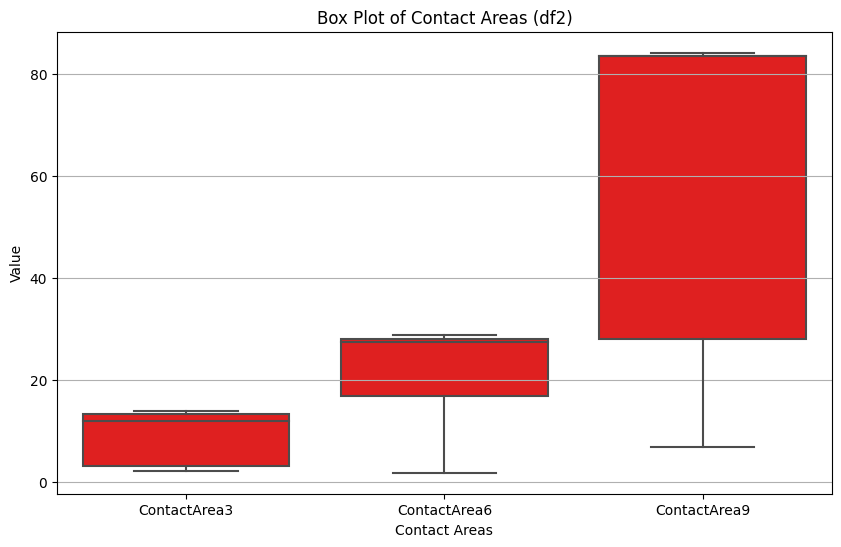

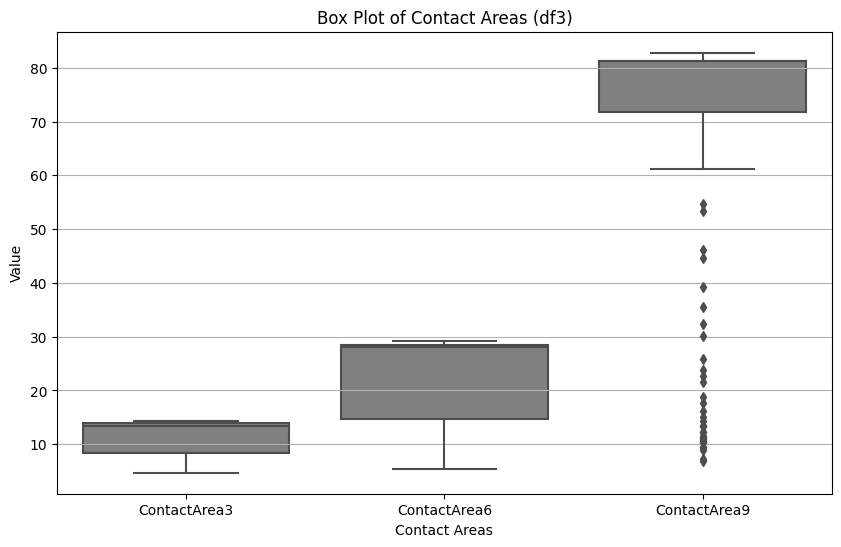

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2[['ContactArea3', 'ContactArea6', 'ContactArea9']], color='red')

plt.title('Box Plot of Contact Areas (df2)')
plt.xlabel('Contact Areas')
plt.ylabel('Value')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df3[['ContactArea3', 'ContactArea6', 'ContactArea9']], color='grey')

plt.title('Box Plot of Contact Areas (df3)')
plt.xlabel('Contact Areas')
plt.ylabel('Value')
plt.grid(axis='y')
plt.show()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


0.24       0.25
0.09       0.25
0.11       0.25
0.06       0.25
0.00       0.25
           ... 
0.05.11    0.25
0.14.15    0.25
0.02.18    0.25
0.16.17    0.25
0.03.11    0.25
Length: 250, dtype: float64


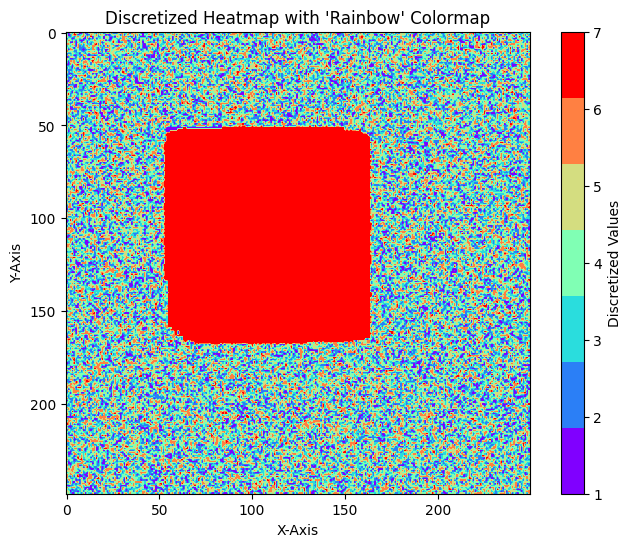

In [65]:
pdf = pd.read_csv('/content/pressuredata-ia6-sys3023.csv',low_memory=False)
max_value = np.max(pdf)
print(max_value)

category_boundaries = [0, 0.04, 0.08, 0.12, 0.16, 0.20, 0.25]

# Discretize the data into seven categories
discretized_data = np.digitize(pdf, category_boundaries)

# Create a heatmap using the 'rainbow' colormap
plt.figure(figsize=(8, 6))
cmap = plt.get_cmap('rainbow', len(category_boundaries))
heatmap = plt.imshow(discretized_data, cmap=cmap)

# Add a colorbar to show the discretized values
cbar = plt.colorbar(heatmap, ticks=range(1, len(category_boundaries) + 1))
cbar.set_label('Discretized Values')

plt.title("Discretized Heatmap with 'Rainbow' Colormap")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()